In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [2]:
def log_plus_one(x):
    return np.log(x+1)

In [33]:
df = pd.read_csv('../data/nyc_bldg2021_model_ready.csv')

with open("X_train_ct.pickle", "rb") as f:
    X_train_ct = pickle.load(f)

with open("y_train.pickle", "rb") as f:
    y_train = pickle.load(f)

with open("X_test_ct.pickle", "rb") as f:
    X_test_ct = pickle.load(f)

with open("y_test.pickle", "rb") as f:
    y_test = pickle.load(f)

with open("one_hot_encoder.pickle", "rb") as f:
    oh = pickle.load(f)

# Linear Regression

In [34]:
lr = LinearRegression()
lr.fit(X_train_ct, y_train)
k = 10
print(f"Training R2 = {lr.score(X_train_ct, y_train)}")
print(f"Testing R2 = {lr.score(X_test_ct, y_test)}")

Training R2 = 0.8215567053590463
Testing R2 = 0.8112429671749377


In [35]:
with open("lr_model.pickle", "wb") as f:
    pickle.dump(lr, f)

In [36]:
lr.coef_

array([-5.07208850e+03,  8.23652829e+03,  2.50283057e+03, -4.56413081e+02,
        2.57513923e+03,  1.26115093e+03, -7.05832198e+02, -4.49059047e+02,
        2.54778224e+03, -2.57886738e+03, -1.80323234e+03,  3.88619916e+02,
       -1.04618219e+03,  2.65233649e+01, -4.53261024e+00,  2.11064122e+02,
        2.32563143e+01,  6.13935760e+01, -6.23293624e+02,  1.47132227e+02,
        1.94398533e+02, -5.37880613e+03,  7.65136315e+02, -3.97970224e+01,
        3.25721487e+00, -2.03490576e+02, -3.09711702e+01, -8.27976560e+01,
        1.81547034e+03, -2.54883822e+02, -3.07422529e+02,  9.70847621e+03,
        1.44434959e+01,  2.85556485e+00,  1.07385036e+02,  5.38509906e+00,
        8.55031714e+00, -2.56728898e+03,  3.58860109e+00,  1.28073542e+01,
        5.18625783e+01, -1.35215385e+00,  1.12262752e+01,  1.02211484e+00,
       -8.88760614e-01,  1.95018783e+02, -1.20319356e+00,  9.62345134e-01,
       -2.50127901e+02, -2.08226657e+02,  1.12008923e+02, -1.59838279e+01,
       -7.71024999e+02,  

# Ridge Model

In [37]:
# Instantiate.
ridge_model = Ridge(alpha=10)

# Fit.
ridge_model.fit(X_train_ct, y_train)

# Evaluate model using R2.
print(ridge_model.score(X_train_ct, y_train))
print(ridge_model.score(X_test_ct, y_test))

0.7954810379077157
0.8244151567596019


In [38]:
r_alphas = np.logspace(0.1, 3, 100)
ridge_cv = RidgeCV(alphas = r_alphas, scoring='r2', cv = 10)
ridge_cv.fit(X_train_ct, y_train)

RidgeCV(alphas=array([   1.25892541,    1.34676844,    1.44074081,    1.54127022,
          1.64881419,    1.76386217,    1.88693776,    2.0186011 ,
          2.1594514 ,    2.3101297 ,    2.47132176,    2.64376119,
          2.82823278,    3.0255761 ,    3.23668929,    3.46253315,
          3.70413553,    3.96259601,    4.23909088,    4.53487851,
          4.85130507,    5.18981068,    5.55193591,    5.93932887,
          6.35375264,    6.79709332,    7.27136862,    7.77873705,
          8.32150772,    8.90215085,    9....
        161.84187792,  173.13458823,  185.21526088,  198.1388769 ,
        211.96425366,  226.75431259,  242.57636554,  259.50242114,
        277.60951248,  296.98004774,  317.70218523,  339.87023462,
        363.58508612,  388.9546697 ,  416.09444628,  445.12793318,
        476.1872663 ,  509.41380148,  544.95875783,  582.98390597,
        623.66230422,  667.17908629,  713.7323038 ,  763.53382765,
        816.81031231,  873.8042273 ,  934.77496078, 1000.        ]),
        cv=10, scoring='r2')

In [39]:
ridge_cv.alpha_

296.980047740645

In [40]:
coefs = ridge_cv.coef_
print(f"Training Ridge_cv_r2 = {ridge_cv.score(X_train_ct, y_train)}")
print(f"Training Ridge_cv_r2 = {ridge_cv.score(X_test_ct, y_test)}")

Training Ridge_cv_r2 = 0.7893261227297141
Training Ridge_cv_r2 = 0.8200636599176777


# LASSO Regression

In [41]:
lasso_cv = LassoCV(cv =10)

lasso_cv.fit(X_train_ct, y_train)
lasso_cv.alpha_

/Users/ella/opt/anaconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 924.3186630322598, tolerance: 864.6110098275997
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ella/opt/anaconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 998.09038835112, tolerance: 864.6110098275997
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ella/opt/anaconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1088.6097559561022, tolerance: 864.6110098275997
  model = cd_fast.enet_coordinate_descent_gram(
/Users/ella/opt/anaconda3/envs/dsi/

0.14292726303604314

In [42]:
print(f"Training Lasso_cv_r2 = {lasso_cv.score(X_train_ct, y_train)}")
print(f"Testing Lasso_cv_r2 = {lasso_cv.score(X_test_ct, y_test)}")

Training Lasso_cv_r2 = 0.7877206972467033
Testing Lasso_cv_r2 = 0.8217797758932959


In [19]:
# Which features appear to add 
ridge_cv.coef_
coef_df = pd.DataFrame({'feature': X_train_ct.columns, 'coefficient': ridge_cv.coef_})
coef_df['abs_coef'] = np.abs(coef_df['coefficient'])
coef_df.sort_values('abs_coef', ascending=False).head()
#coef_df.loc[coef_df.feature == 'oh__number.of.energy.meters.cat_90', :]

,feature,coefficient,abs_coef
31,normalized_gas_intensity Year.Built,4.362974,4.362974
32,normalized_gas_intensity energy_score,-3.910939,3.910939
52,energy_score Latitude,-3.599430,3.599430
37,normalized_gas_intensity Longitude,-3.524945,3.524945
2,normalized_gas_intensity,3.489273,3.489273


# Random Forest Regression

In [20]:
rf = RandomForestRegressor()
et = ExtraTreesRegressor()

In [21]:
print(f"Training Random Forest_cv_r2 = {cross_val_score(rf, X_train_ct, y_train, cv=10).mean()}")

Training Random Forest_cv_r2 = 0.9047021386925345


In [22]:
print(f"Testing Random Forest_cv_r2 = {cross_val_score(rf, X_test_ct, y_test, cv=10).mean()}")

Testing Random Forest_cv_r2 = 0.8693910050168817


In [23]:
rf_params = {
    'n_estimators': [250, 300, 350],
    'max_depth': [None, 1, 2],
}

gs = GridSearchCV(rf, param_grid=rf_params, cv=2)
gs.fit(X_train_ct, y_train)
print(gs.best_score_)
gs.best_params_

0.8960412206188809


{'max_depth': None, 'n_estimators': 300}

In [24]:
gs.score(X_train_ct, y_train)

0.9871016675207015

In [25]:
gs.score(X_test_ct, y_test)

0.9473141818473141

In [26]:
gs.best_estimator_.feature_importances_

array([5.67739188e-04, 4.59253693e-04, 7.78543648e-03, 2.86517039e-04,
       2.02838775e-03, 9.03950277e-04, 5.87672060e-05, 7.00746661e-03,
       2.05664550e-06, 1.28523357e-03, 3.30893148e-03, 5.56970000e-04,
       2.17586719e-03, 9.60286162e-04, 7.17589702e-04, 1.81533823e-02,
       1.25964006e-03, 5.72621400e-04, 1.33949299e-06, 1.53715742e-03,
       1.21400057e-03, 2.25253139e-03, 1.03518674e-03, 5.60468156e-04,
       1.50203647e-02, 9.38367055e-04, 4.74692257e-04, 1.88063135e-06,
       1.18075525e-03, 1.13549762e-03, 7.18535712e-03, 1.50212557e-01,
       5.45470541e-03, 1.43021803e-02, 9.73028232e-02, 5.57793433e-07,
       1.25095261e-02, 8.81595992e-02, 1.71635343e-03, 1.40374346e-03,
       3.91844356e-04, 1.78616179e-03, 2.25224435e-06, 2.31947376e-03,
       2.68341197e-03, 4.43586694e-01, 1.70157189e-03, 2.62744625e-03,
       1.72525268e-06, 2.19078281e-03, 4.14707744e-03, 1.48246140e-03,
       6.26008213e-03, 2.10044627e-06, 1.69160780e-02, 4.21214448e-02,
      

In [30]:
def plot_feature_importance(importance, names, model_type, num_features: int):

    #Create a DataFrame using a Dictionary
    feature_df = pd.DataFrame({
        'feature_names':names,
        'feature_importance':importance}
    )

    #Sort the DataFrame in order decreasing feature importance
    feature_df = feature_df \
        .sort_values(by=['feature_importance'], ascending=False) \
        .iloc[:num_features,:]

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    
    #Plot Searborn bar chart
    sns.barplot(x=feature_df['feature_importance'], y=feature_df['feature_names'])
    
    #Add chart labels
    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')


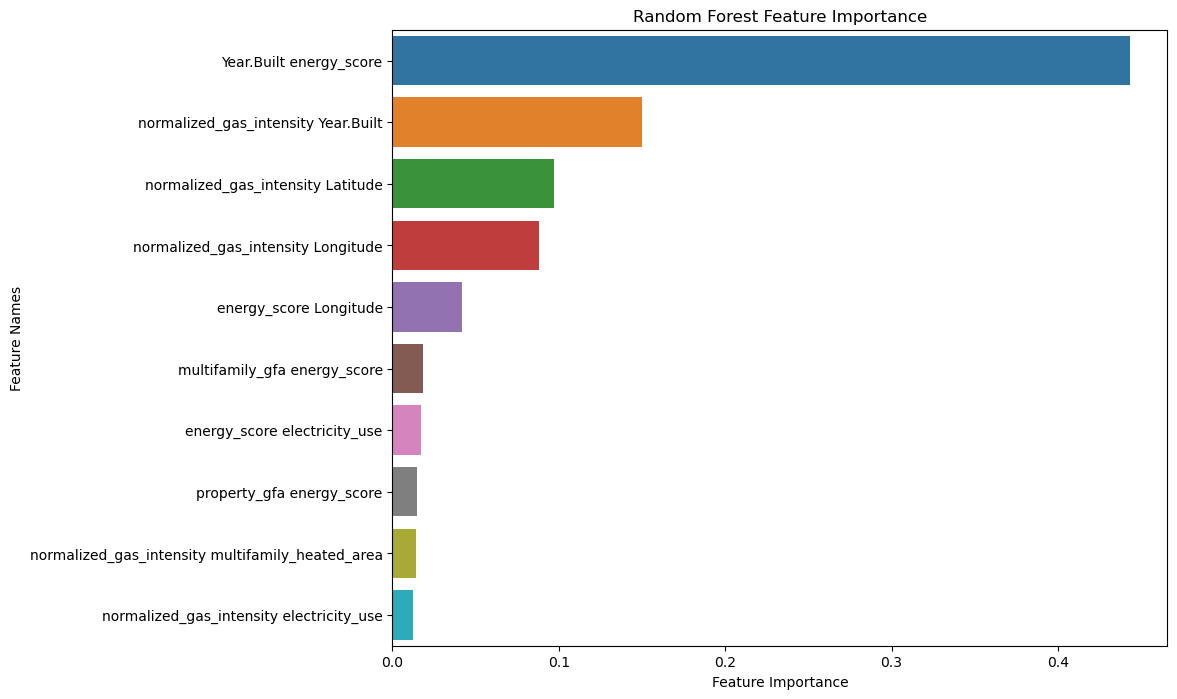

In [31]:
plot_feature_importance(gs.best_estimator_.feature_importances_,
                        X_train_ct.columns, "Random Forest", 10)

In [43]:
X_train_ct.shape

(8624, 97)